Status : Berhasil menyambungkan ke i-ot.net
Subscribe topik terdeteksi :  1



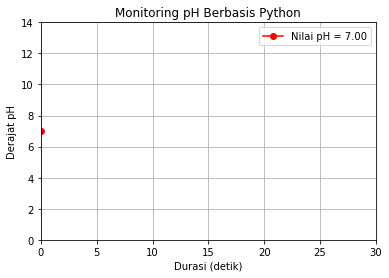

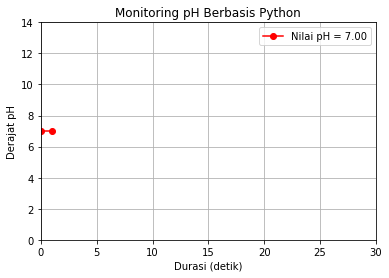

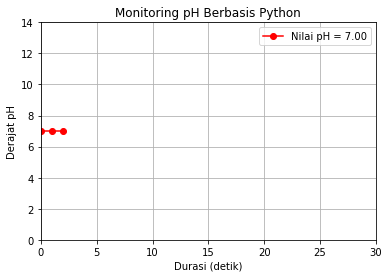

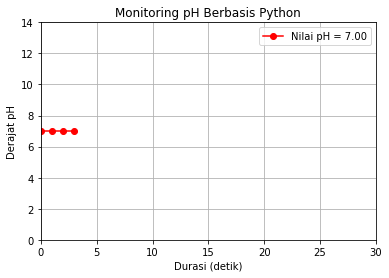

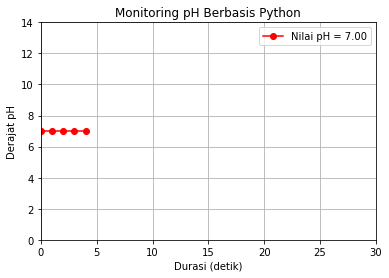

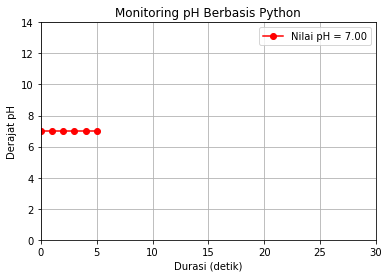

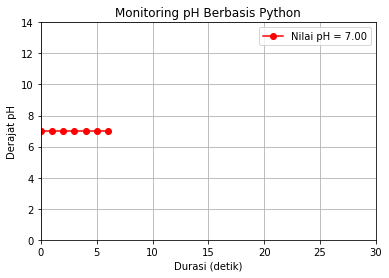

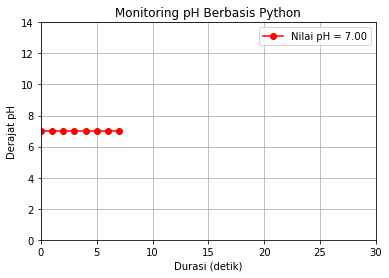

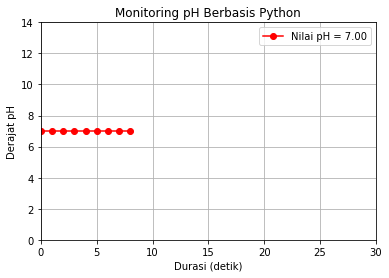

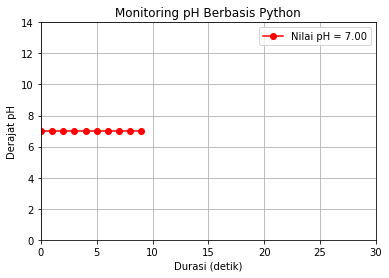

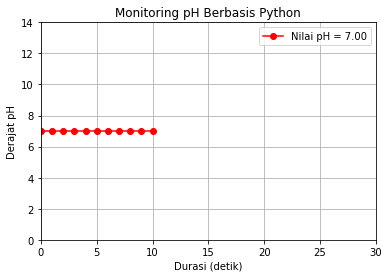

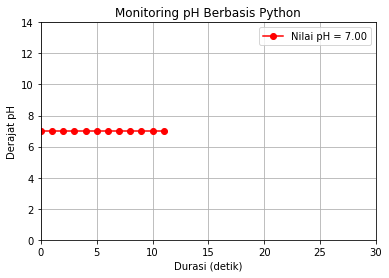

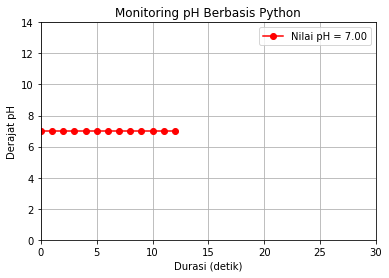

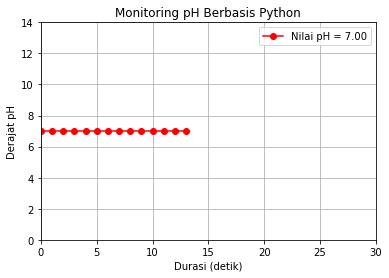

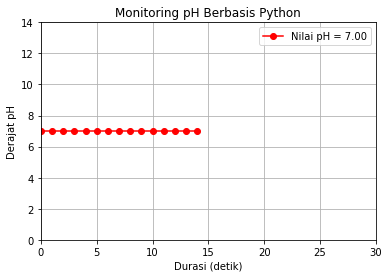

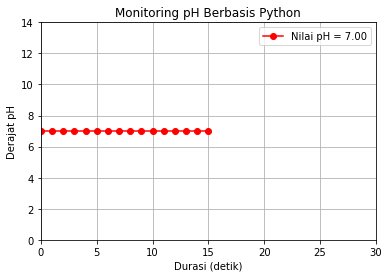

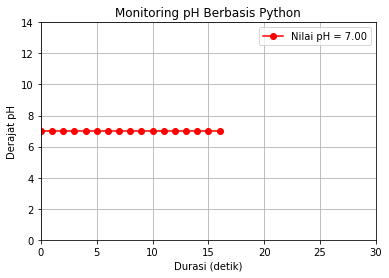

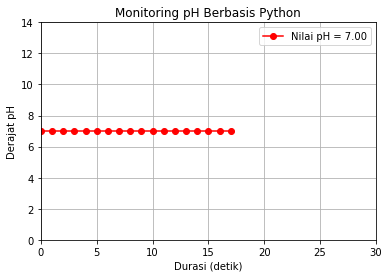

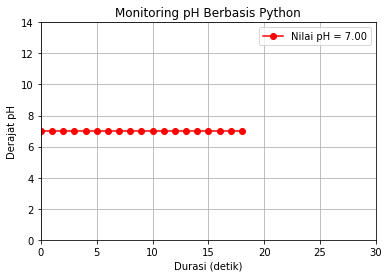

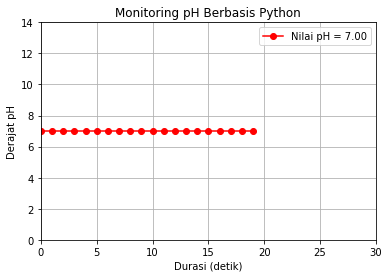

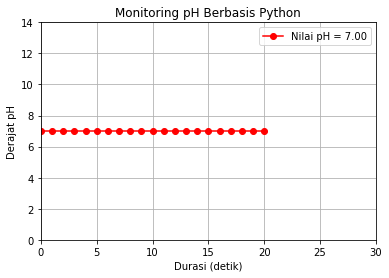

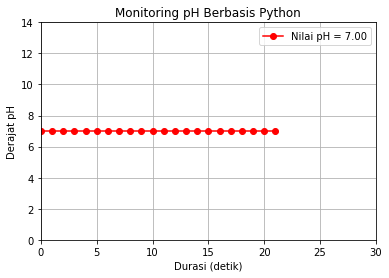

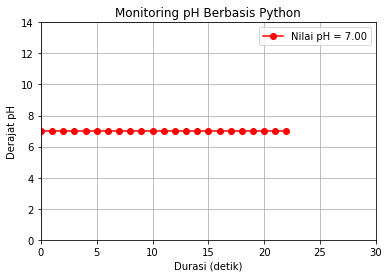

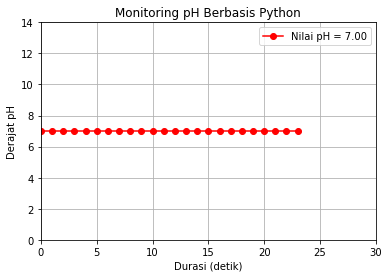

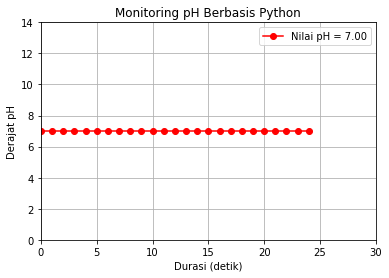

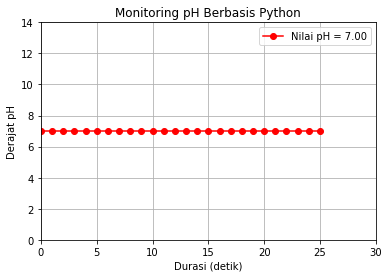

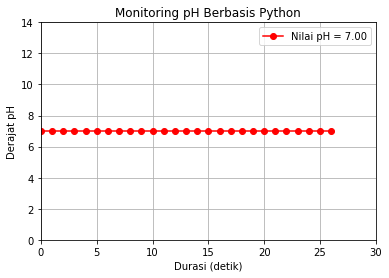

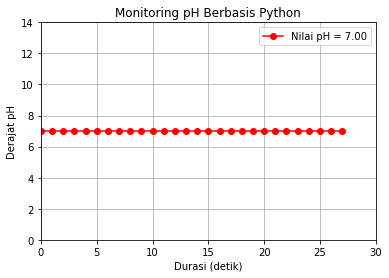

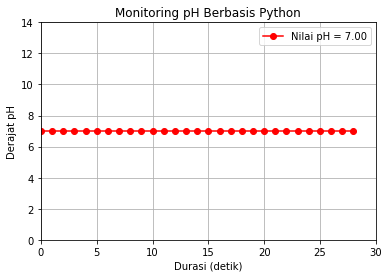

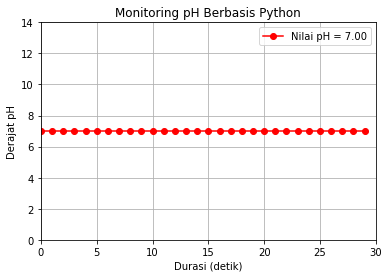

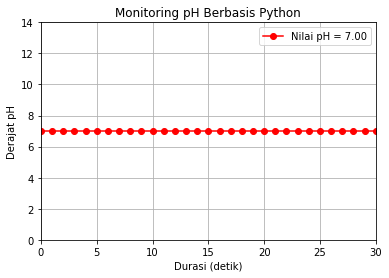

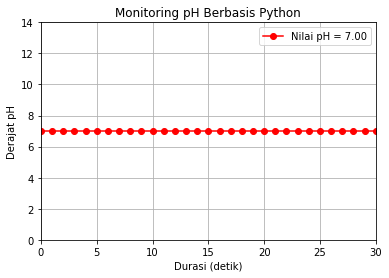

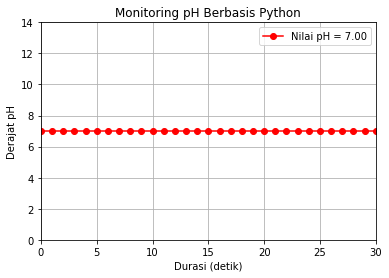

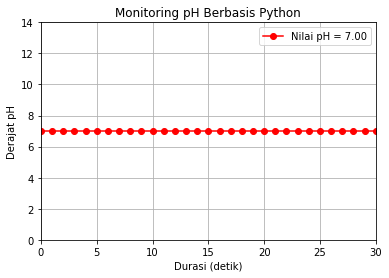

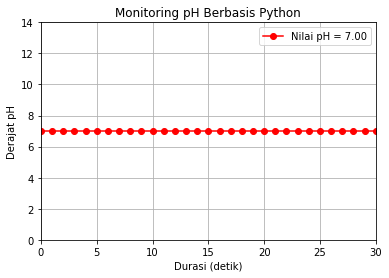

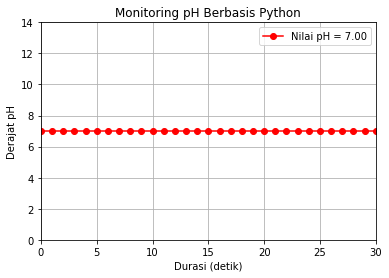

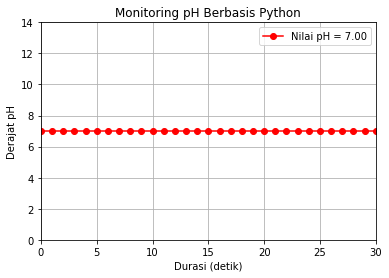

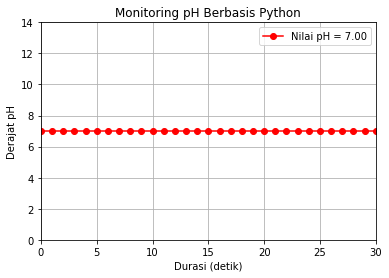

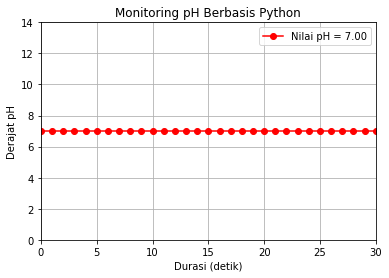

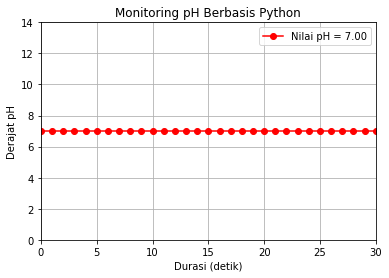

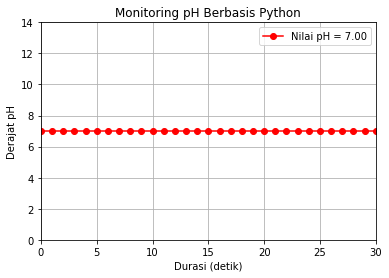

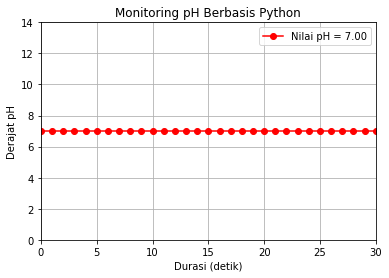

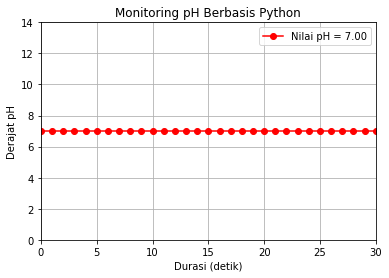

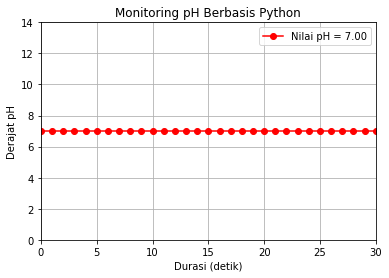

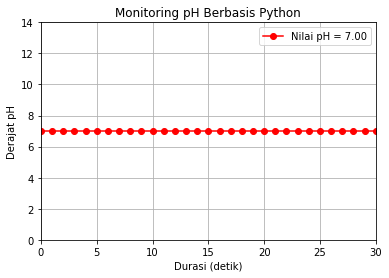

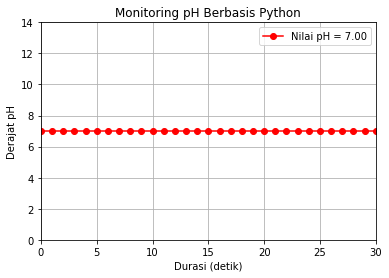

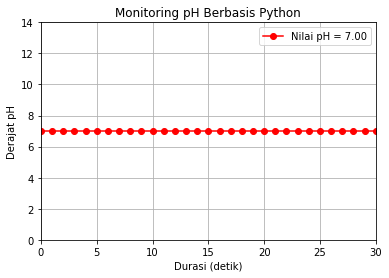

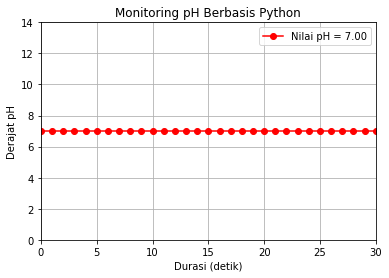

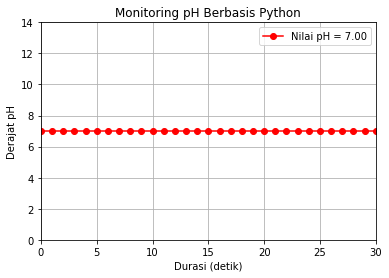

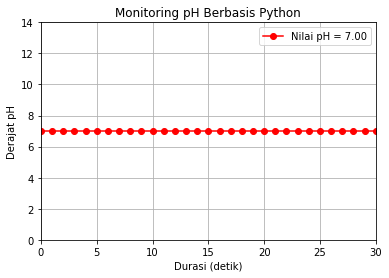

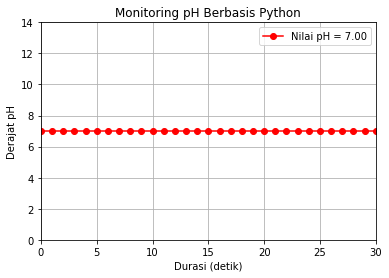

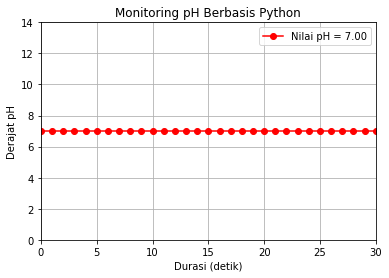

KeyboardInterrupt: 

In [5]:
import paho.mqtt.client as mqtt_client
import numpy as np
import matplotlib.pyplot as plt
from drawnow import *
import time

Connected = False
SubTopic = False
MsgData = False
broker = "i-ot.net"
port = 1883
client_id = " "
topic = " "
username = " "
password = " "

def connect_mqtt() -> mqtt_client:
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Status : Berhasil menyambungkan ke i-ot.net")
            global Connected
            Connected = True
        else:
            print("Status : Gagal menyambungkan ke i-ot.net.....")

    def on_subscribe(client, userdata, mid, qos):
        print("Subscribe topik terdeteksi : ", str(mid))
        print("=======================================================================\n")
        global SubTopic
        SubTopic = True

    def on_message(client, userdata, message):
        readMQTT = "{:.2f}".format(float(message.payload.decode("utf-8")))
        datapH = str(readMQTT)
        global MsgData
        MsgData = True
        
        tempPH = []
        plt.ion()
        i = 0
        
        def makeFig():
            plt.xlim(0,30)                                   
            plt.ylim(0,14)                                        
            plt.title('Monitoring pH Berbasis Python')   
            plt.grid(True)                                        
            plt.xlabel('Durasi (detik)')                          
            plt.ylabel('Derajat pH')                              
            plt.plot(tempPH, 'ro-', label='Nilai pH = ' + readMQTT)      
            plt.legend(loc='upper right')  
        
        while True:
            while (datapH == 0):
                pass
            readData = datapH
            temp = float(readData)
            tempPH.append(temp)
            drawnow(makeFig)   
            plt.pause(.000001) 
            i=i+1
            time.sleep(5)
            if(i>50):  
                tempPH.pop(0)
               
    client = mqtt_client.Client(client_id)
    client.username_pw_set(username, password)
    client.on_connect = on_connect
    client.on_message = on_message
    client.on_subscribe = on_subscribe
    client.connect(broker, port)
    client.subscribe(topic)
    return client

def run():
    client = connect_mqtt()
    client.loop_forever()

    while Connected != True:
        time.sleep(5)
        
    while SubTopic != True:
        print("Gagal menemukan topik.....")
        time.sleep(5)
        
    while MsgData != True:
        print("Gagal menerima data.....")
        time.sleep(5)

if __name__ == '__main__':
    run()